# Regression discontinuity

In [ ]:
#| label: load-data
load(here("data/working/rpd.RData"))

In [ ]:
#| label: tbl-summary
#| tbl-cap: "Summary statistics"

var_groups <- here("results/var_groups.csv") |>
  read_csv() |>
  select(name = variable, group, label)

Rows: 132 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): variable, label, col_type, group
dbl (2): pos, missing
lgl (2): levels, value_labels

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Variable 
 n 
 Mean 
 Median 
 Std.Dev. 
 Min 
 Max 
 
 
 
 
 Covariates 
 
 Age at displacement date 
 488,847 
 25.1 
 23.2 
 5.9 
 18 
 65 
 Birth date 
 488,847 
 1,994 
 1,995.7 
 6 
 1,952.3 
 2,002.8 
 Date worker began working 
 497,834 
 2,015.5 
 2,015.6 
 0.9 
 2,014 
 2,017 
 Days since account opened at displacement date 
 497,834 
 1,264.2 
 1,258 
 102.6 
 1,095 
 1,460 
 Displacement date 
 497,834 
 2,019 
 2,019 
 0.9 
 2,017 
 2,021 
 Female 
 497,834 
 0.4 
 0 
 0.5 
 0 
 1 
 No CURP 
 497,834 
 0 
 0 
 0.1 
 0 
 1 
 
 Medium term 
 
 Average monthly earnings after displacement (2024 MXN) 
 450,035 
 8,930.6 
 7,531.9 
 5,523.7 
 3,447.1 
 84,670.2 
 Average monthly earnings in year 1 after displacement (2024 MXN) 
 336,243 
 8,100.5 
 6,906 
 5,096.6 
 3,352.8 
 84,996 
 Average monthly earnings in year 2 after displacement (2024 MXN) 
 328,530 
 8,963.2 
 7,512.8 
 5,621.3 
 3,425.5 
 84,803.7 
 Average monthly earnings in year 3 after displacement (2024 MXN) 
 318,536 
 10,058.4 
 8,177.2 
 6,541 
 3,893.4 
 84,835.2 
 Months worked after displacement 
 497,834 
 13.5 
 11.1 
 11.5 
 0 
 89.5 
 Months worked in year 1 after displacement 
 497,834 
 3.5 
 2 
 3.7 
 0 
 25.2 
 Months worked in year 2 after displacement 
 497,834 
 4.9 
 3.4 
 5 
 0 
 36.1 
 Months worked in year 3 after displacement 
 497,834 
 5.1 
 3.4 
 5.2 
 0 
 39.6 
 Total earnings after displacement (2024 MXN) 
 497,834 
 131,442.6 
 81,680.6 
 167,328.5 
 0 
 4,035,598.1 
 Total earnings in year 1 after displacement (2024 MXN) 
 497,834 
 29,054.9 
 13,334.7 
 41,991.2 
 0 
 1,025,728.5 
 Total earnings in year 2 after displacement (2024 MXN) 
 497,834 
 47,268.2 
 23,157.4 
 67,675.3 
 0 
 1,580,786.3 
 Total earnings in year 3 after displacement (2024 MXN) 
 497,834 
 54,958.3 
 25,039.8 
 80,251.6 
 0 
 2,026,944.9 
 
 Next job 
 
 Duration of next job (weeks) 
 493,083 
 33.5 
 13.1 
 52.8 
 0.1 
 407.3 
 Monthly earnings in next job (2024 MXN) 
 493,083 
 8,516.8 
 7,109.2 
 6,538.7 
 1,791.7 
 1,365,657.2 
 Total earnings in next job (2024 MXN) 
 493,083 
 81,163.8 
 21,287.9 
 199,304.5 
 118.1 
 6,180,639.5 
 
 Previous job 
 
 Duration of previous job (weeks) 
 497,834 
 28.3 
 17.1 
 29.9 
 0.1 
 156.1 
 Monthly earnings in previous job (2024 MXN) 
 497,834 
 7,984.6 
 6,599.3 
 5,512.3 
 1,791.7 
 62,018.1 
 Total earnings in previous job (2024 MXN) 
 497,834 
 54,045.8 
 26,359.1 
 80,071 
 118.1 
 2,065,184.2 
 
 Survival 
 
 Survival out of formal employment after 3 months 
 497,834 
 0.8 
 1 
 0.4 
 0 
 1 
 Survival out of formal employment after 36 months 
 497,834 
 0.2 
 0 
 0.4 
 0 
 1 
 Weeks out of formal employment censored at 3 months 
 497,834 
 12.2 
 12.9 
 1.6 
 6.3 
 12.9 
 Weeks out of formal employment censored at 36 months 
 497,834 
 67.6 
 43.3 
 57 
 6.3 
 154.3 
 
 Take up 
 
 Days to take up 
 46,256 
 611 
 458 
 539.3 
 46 
 2,880 
 
 
 
 
 Note: This table shows summary statistics of the variables used in thye analysis. The observations included were the final sample of interest.

## Testing identification assumptions

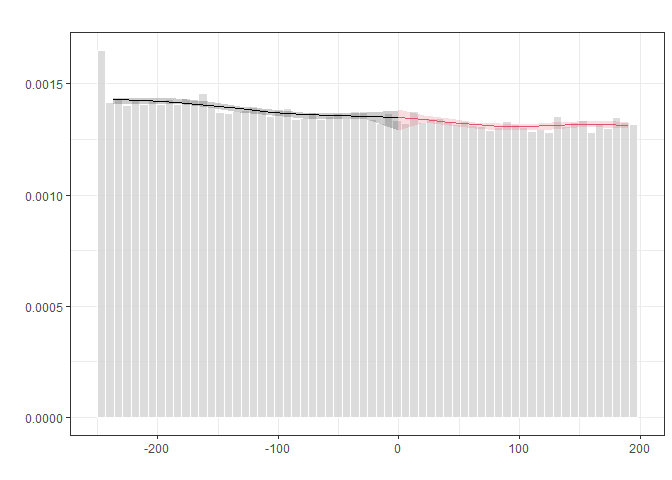

In [ ]:
rdd_object <- rddensity(
  X = rpd$running,
  c = 0
)

left <- min(rpd$running)
right <- max(rpd$running)

density_plot <- rdplotdensity(
  rdd_object,
  X = rpd$running,

  histFillCol = "lightgray",
  histFillShade = 0.8,
  histBreaks = seq(-250, 200, 7)
)

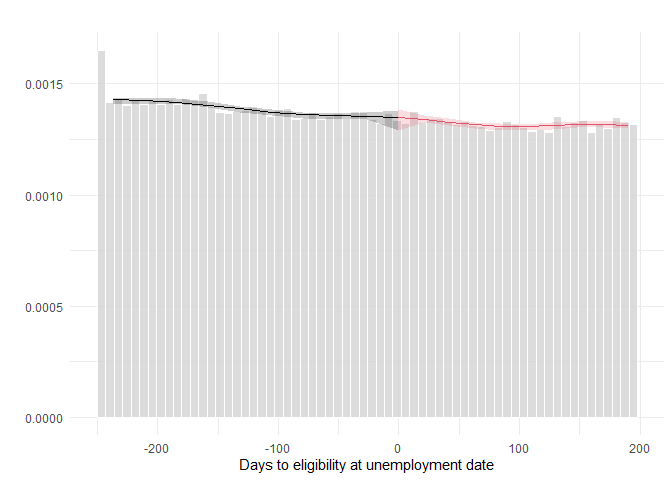

In [ ]:
#| label: fig-density
#| fig-cap: "Density test of the running variable"

density_plot$Estplot +
  labs(
    x = "Days to eligibility at unemployment date"
  ) +
  theme_minimal() +
  theme(legend.position = "none") 

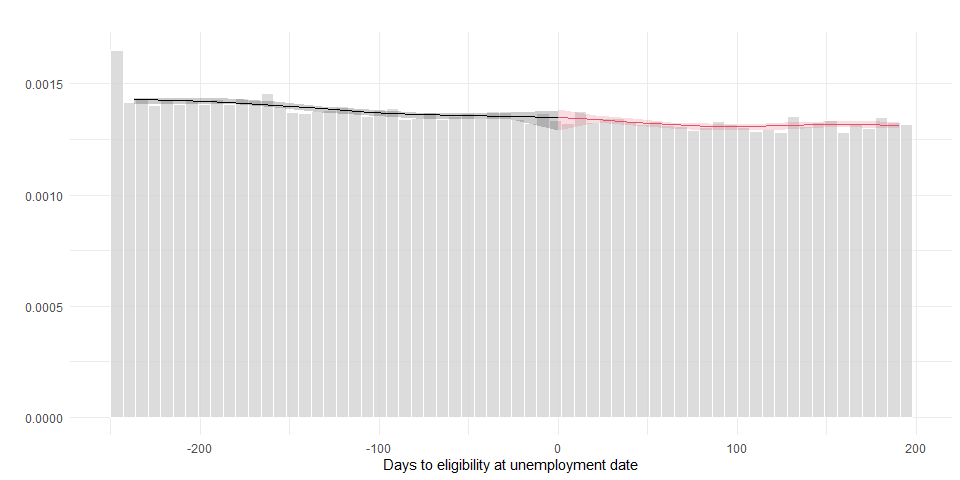

In [ ]:
#| label: fig-density-wide
#| fig-cap: "Density test of the running variable"
#| fig-height: 5
#| fig-width: 10

density_plot$Estplot +
  labs(
    x = "Days to eligibility at unemployment date"
  ) +
  theme_minimal() +
  theme(legend.position = "none") 


rm(density_plot)

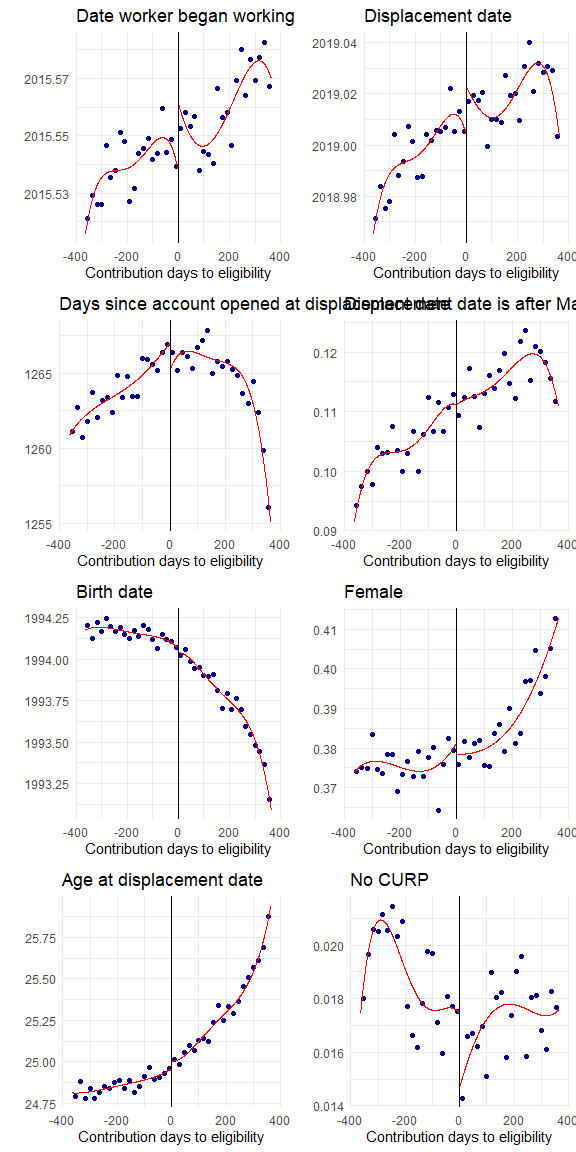

In [ ]:
#| label: fig-covariates-pre
#| fig-cap: "Pre-displacement employment features around RPD threshold"
#| fig-height: 12
#| fig-width: 6

load(here("results/RD/covariates.RData"))

ggarrange(plotlist = covs_plots$plot, nrow = 4, ncol = 2)

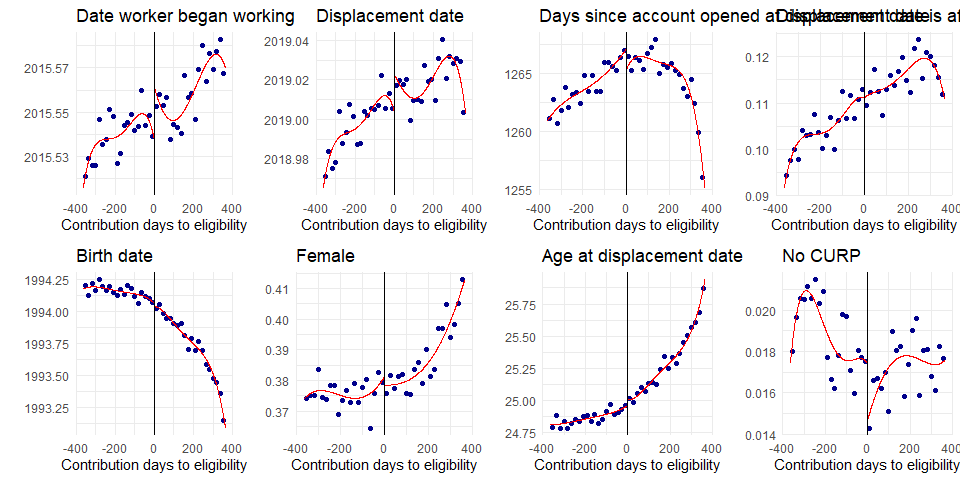

In [ ]:
#| label: fig-covariates-wide
#| fig-cap: "Pre-displacement employment features around RPD threshold"
#| fig-height: 5
#| fig-width: 10

ggarrange(plotlist = covs_plots$plot, nrow = 2, ncol = 4)

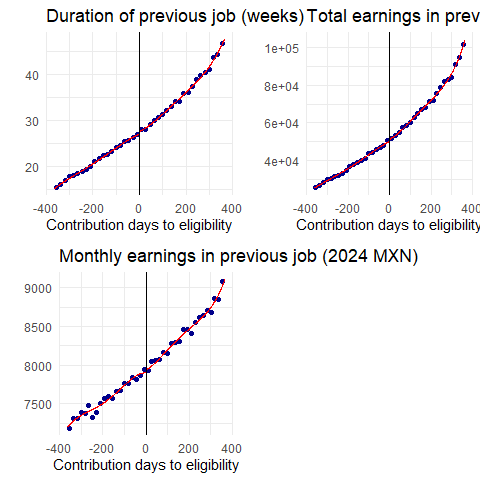

In [ ]:
#| label: fig-pre_unemp
#| fig-cap: "Previous job around RPD threshold"
#| fig-height: 5
#| fig-width: 5

load(here("results/RD/prev_job.RData"))


ggarrange(plotlist = prev_job_plots$plot, ncol = 2, nrow = 2)

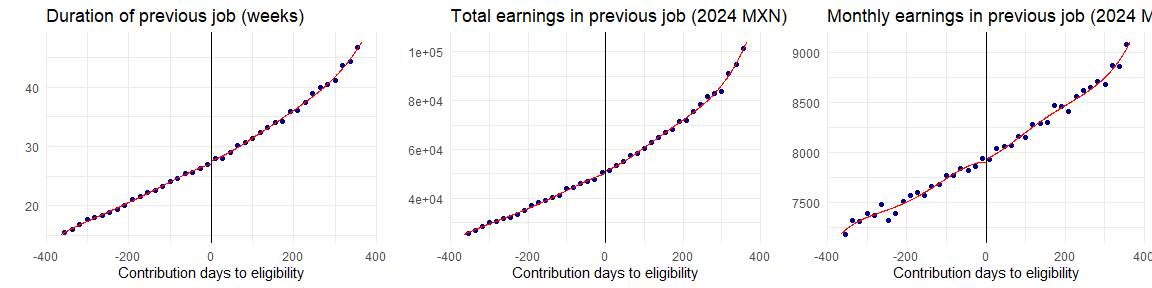

In [ ]:
#| label: fig-pre_unemp-wide
#| fig-cap: "Previous job around RPD threshold"
#| fig-height: 3
#| fig-width: 12

ggarrange(plotlist = prev_job_plots$plot, ncol = 3, nrow = 1)

In [ ]:
#| label: tbl-covariates-bal
#| tbl-cap: "Balance of covariates around RPD threshold"

covs_table |>
    gt() |>
    sub_missing(
        columns = everything(),
        rows = everything(),
        missing_text = " - "
    ) |>
    tab_footnote(
        md("*Note:* This table shows the estimated coefficient of interest in Equation 4.1 using a triangular kernel, optimal bandwidth and a 2nd degree local polynomial. Earnings are expressed in 2024 MXN."),
    ) |>
    fmt_number(
        decimals = 3,
        drop_trailing_zeros = T
    ) |>
    cols_width(
        # where(is.numeric) ~ pct(15),
        " " ~ pct(25),
        everything() ~ pct(18)
    ) |>
    tab_options(
        quarto.use_bootstrap = TRUE
    )
#| label: tbl-covariates-bal
#| tbl-cap: "Balance of covariates around RPD threshold"

rm(covs_table, covs_plots, prev_job_plots)

## Main results

### Effect of RPD eligibility on take up

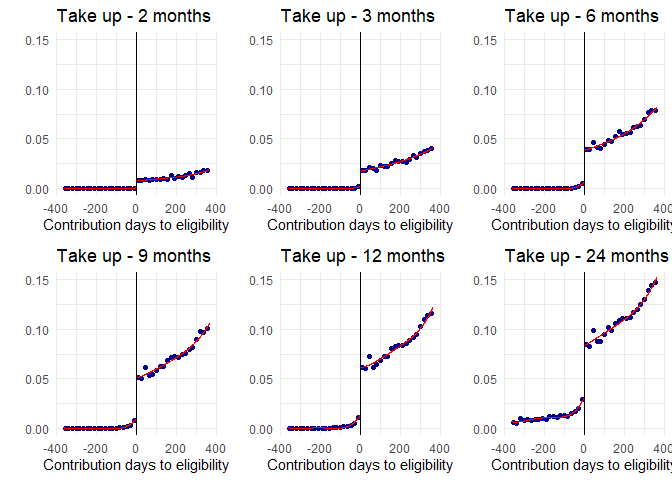

In [ ]:
#| label: fig-take-up
#| fig-cap: "Effect of eligibility on take up"

load(here("results/RD/take_up.RData"))


ggarrange(plotlist = take_up_plots$plot, nrow = 2, ncol = 3)

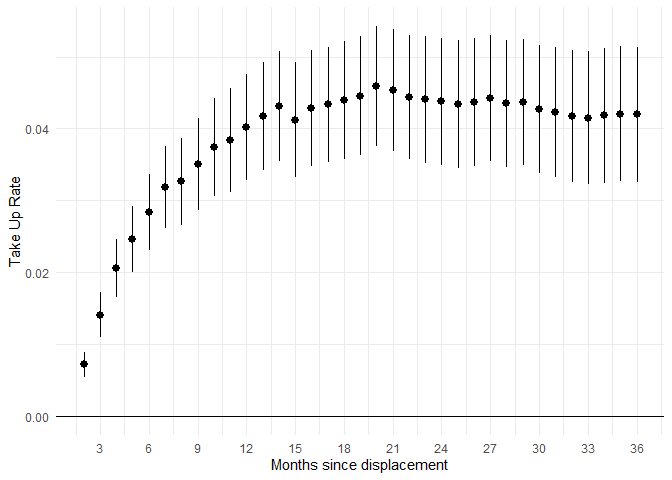

In [ ]:
#| label: fig-take-up-path
#| fig-cap: "Dynamic effect of eligibility on take up. 95 percent confidence intervals"

take_up_path


rm(list = c("take_up_plots", "take_up_path"))

In [ ]:
#| label: tbl-take-up
#| tbl-cap: "Effect of eligibility on take up"

take_up_table |>
  gt() |>
  sub_missing(columns = everything(),
              rows = everything(),
              missing_text = " - ") |>
  tab_footnote(
    md("*Note:* This table shows the estimated coefficient of interest in Equation 4.1 using a triangular kernel, optimal bandwidth and a 2nd degree local polynomial."),
  ) |>
  fmt_number(
    decimals = 3,
    drop_trailing_zeros = T
  ) |>
  # cols_width(
  #   # where(is.numeric) ~ pct(15),
  #   # " " ~ pct(25),
  #   # everything() ~ pct(18)
  # ) |>
  tab_options(

    # table.width = pct(100),
    quarto.use_bootstrap = TRUE
  ) 
#| label: tbl-take-up
#| tbl-cap: "Effect of eligibility on take up"

rm(take_up_table)

### Effect of RPD on job search outcomes

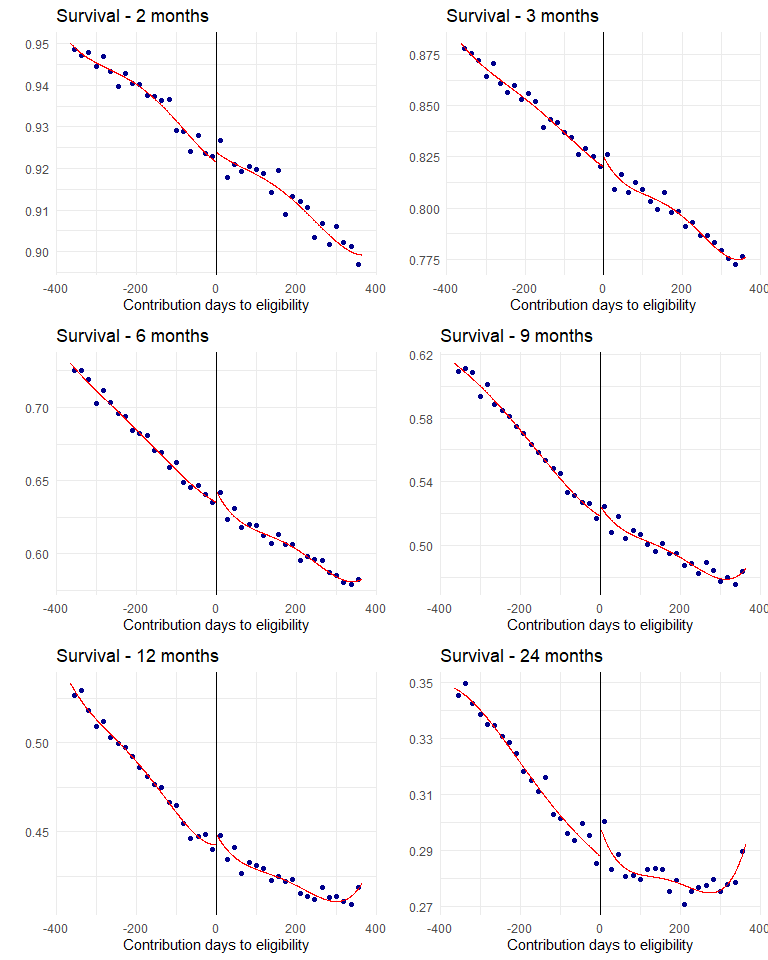

In [ ]:
#| label: fig-survival
#| fig-cap: "Effect of eligibility on survival in unemployment"
#| fig-height: 10
#| fig-width: 8

load(here("results/RD/job_search.RData"))

ggarrange(plotlist = survival_plots$plot, ncol = 2, nrow = 3)

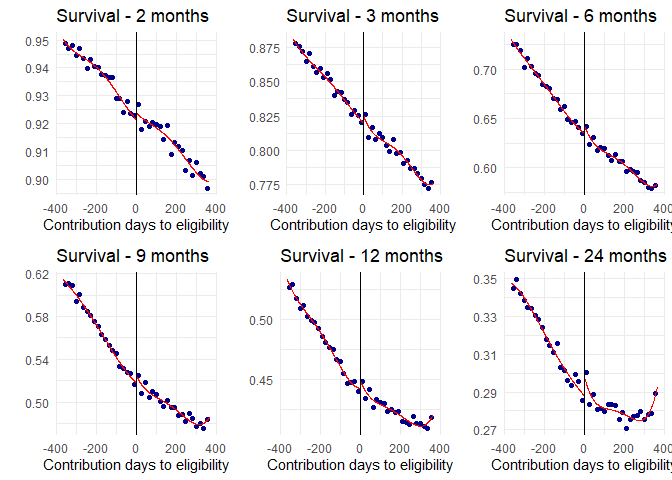

In [ ]:
#| label: fig-survival-wide
#| fig-cap: "Effect of eligibility on survival in unemployment"

ggarrange(plotlist = survival_plots$plot, ncol = 3, nrow = 2)

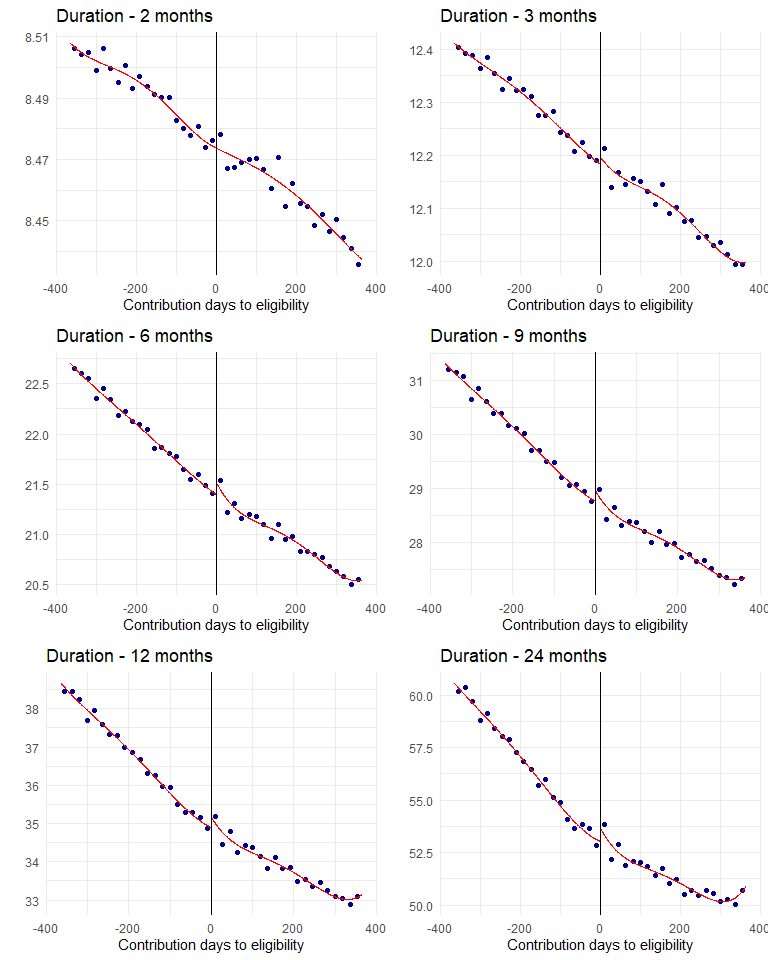

In [ ]:
#| label: fig-duration
#| fig-cap: "Effect of eligibility on duration of unemployment spell"
#| fig-height: 10
#| fig-width: 8

ggarrange(plotlist = duration_plots$plot, ncol = 2, nrow = 3)

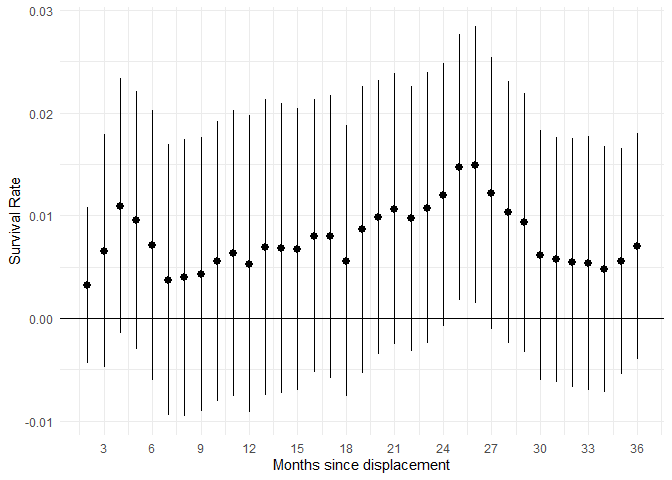

In [ ]:
#| label: fig-survival-path
#| fig-cap: "Dynamic effect of eligibility on survival in unemployment. 95 percent confidence intervals"

survival_path

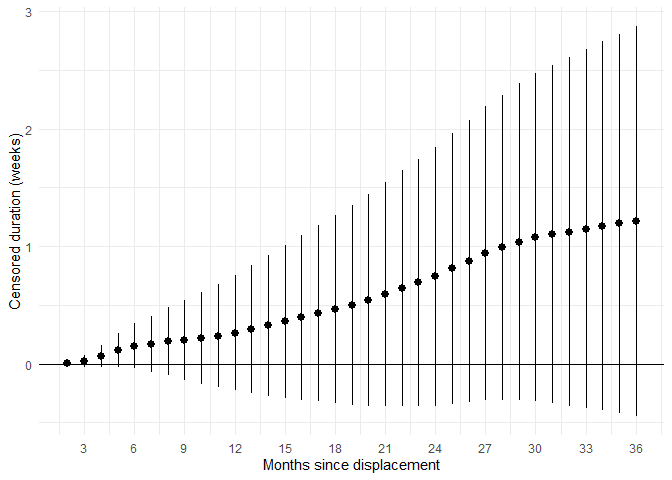

In [ ]:
#| label: fig-duration-path
#| fig-cap: "Dynamic effect of eligibility on duration of unemployment. 95 percent confidence intervals"

duration_path

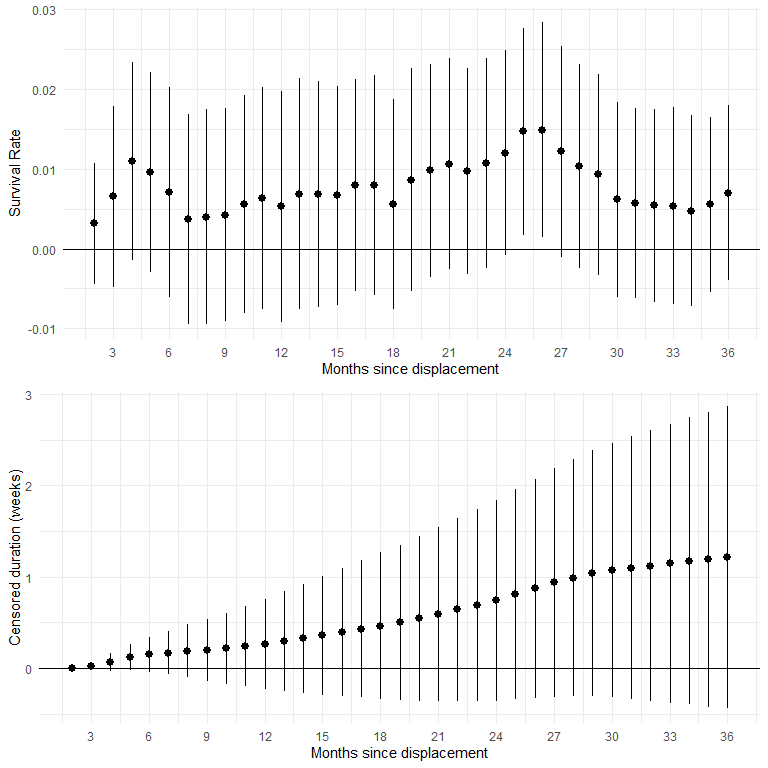

In [ ]:
#| label: fig-treat-path
#| fig-cap: "Dynamic effect of eligibility on survival and duration of unemployment. 95 percent confidence intervals"
#| fig-height: 8
#| fig-width: 8

ggarrange(survival_path, duration_path, nrow = 2)

In [ ]:
#| label: tbl-effects
#| tbl-cap: "RPD effect on job search outcomes"

job_search_table |>
  gt() |>
  sub_missing(columns = everything(),
              rows = everything(),
              missing_text = " - ") |>
  tab_footnote(
    md("*Note:* This table shows the estimated coefficient of interest in Equation 4.1 using a triangular kernel, optimal bandwidth and a 2nd degree local polynomial."),
  ) |>
  fmt_number(
    decimals = 3,
    drop_trailing_zeros = T
  ) |>
  cols_width(
    # where(is.numeric) ~ pct(15),
    " " ~ pct(25),
    everything() ~ pct(18)
  ) |>
  tab_options(

    # table.width = pct(100),
    quarto.use_bootstrap = TRUE
  ) 
#| label: tbl-effects
#| tbl-cap: "RPD effect on job search outcomes"

rm(job_search_table, survival_plots, duration_plots, survival_path, duration_path)

### Medium run effects

In [ ]:
#| label: tbl-medium
#| tbl-cap: "RPD Effect: Earnings, Emloyment and Wages over Medium Run"

load(here("results/RD/medium_term.RData"))

medium_table |>
  rename(" " = 1) |>
  gt() |>
  fmt_number(decimals = 3, drop_trailing_zeros = T) |>
  tab_footnote(
    md("*Note:* This table shows the estimated coefficient of interest in Equation 4.1 using a triangular kernel, optimal bandwidth and a 2nd degree local polynomial."),
  ) |>
  fmt(
    columns = " ",
    fns = gt::md
  ) |>
  tab_options(
    quarto.use_bootstrap = TRUE
  )
#| label: tbl-medium
#| tbl-cap: "RPD Effect: Earnings, Emloyment and Wages over Medium Run"

rm(medium_term)

Warning in rm(medium_term): object 'medium_term' not found